In [12]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [35]:
wine_df = pd.read_csv('./wine.csv')


In [36]:
wine_df

,id,alcohol,fixed_acidity,residual_sugar,quality,density
0,0,13.6,9.3,6.4,high,1.0005
1,1,14.0,11.2,2.0,medium,0.9912
2,2,8.2,11.6,0.9,low,0.9935
3,3,12.7,12.9,6.6,low,1.0002
4,4,10.4,13.9,13.8,medium,0.9942
...,...,...,...,...,...,...
995,995,13.1,13.0,4.3,low,1.0035
996,996,9.5,6.4,5.3,low,1.0040
997,997,13.8,4.5,9.0,medium,0.9931
998,998,8.1,5.3,12.2,low,0.9955


In [37]:
print(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1000 non-null   int64  
 1   alcohol         990 non-null    float64
 2   fixed_acidity   1000 non-null   float64
 3   residual_sugar  997 non-null    float64
 4   quality         1000 non-null   object 
 5   density         1000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB
None


In [38]:
print(wine_df.describe())

                id     alcohol  fixed_acidity  residual_sugar      density
count  1000.000000  990.000000    1000.000000      997.000000  1000.000000
mean    499.500000   11.038081      10.174300        7.685757     0.997505
std     288.819436    1.763647       3.452693        4.213067     0.004300
min       0.000000    8.000000       4.000000        0.500000     0.990000
25%     249.750000    9.500000       7.100000        4.100000     0.993900
50%     499.500000   11.000000      10.400000        7.500000     0.997400
75%     749.250000   12.600000      13.125000       11.500000     1.001200
max     999.000000   14.000000      16.000000       15.000000     1.005000


In [39]:
print(wine_df.isnull().sum())

id                 0
alcohol           10
fixed_acidity      0
residual_sugar     3
quality            0
density            0
dtype: int64


In [65]:
wine_temp = wine_df.copy()

In [66]:
wine_temp = wine_temp.fillna(wine_temp.mean(numeric_only=True))


In [67]:
features_temp = wine_temp.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_temp = scaler.fit_transform(features_temp)

In [68]:
kmeans_temp = KMeans(n_clusters=3, random_state=42)
wine_temp['cluster'] = kmeans_temp.fit_predict(scaled_temp)

c:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~

In [72]:
wine_final = wine_df.copy()

for col in wine_final.columns:
    if wine_final[col].isnull().sum() > 0:
        for cluster in range(3):
            cluster_mean = wine_temp[wine_temp['cluster'] == cluster][col].mean()
            mask = (wine_temp['cluster'] == cluster) & (wine_final[col].isnull())
            wine_final.loc[mask, col] = cluster_mean

In [73]:
features_final = wine_final.select_dtypes(include=[np.number])
scaled_final = scaler.fit_transform(features_final)

In [74]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
wine_final['cluster'] = kmeans_final.fit_predict(scaled_final)

In [78]:
inertias = []
k_range = range(1 , 11)

In [81]:
from sklearn.cluster import KMeans

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)  # X deve ser sua matriz de dados
    inertias.append(kmeans.inertia_)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

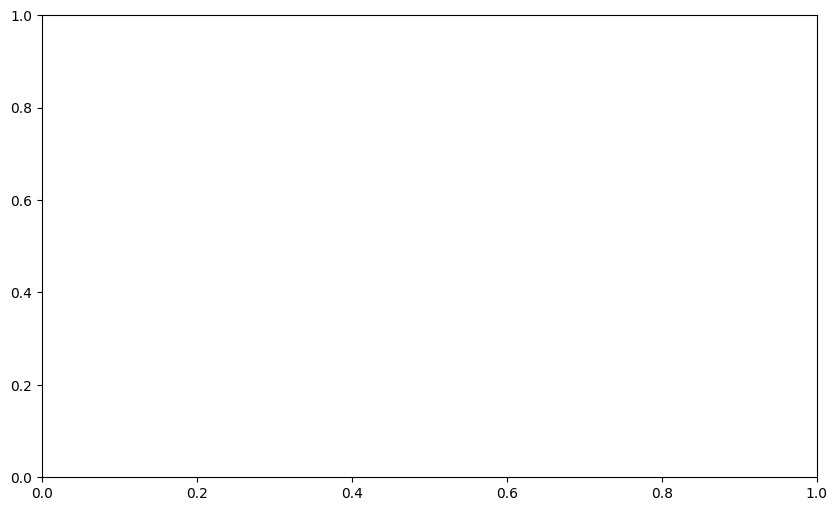

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker = 'o' )

plt.title('Clusters com PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values